In [ ]:
!pip install xgboost
!pip install --upgrade scikit-learn

In [ ]:
#===== Set Up Library =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # baseline model
from sklearn.tree import DecisionTreeRegressor #decision tree
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor #Ensemble Learning type Bagging
from sklearn.ensemble import GradientBoostingRegressor #Ensemble Learning type Boosting
from xgboost import XGBRegressor #ensemble learning gradient

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)
from sklearn.model_selection import train_test_split

In [ ]:
import drive

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science - Google Collaboratory/DS Dibimbing/Latihan Coding/Extra Class 4 - Gradient boosted trees & ensemble models and deep learning/Assignment/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None,
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
 std     421.610009    42.300571    24.284752    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
 75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
 mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
 std       1.112799    30.202904     20.645407   181.06

# 1. Data Preprossesing

In [ ]:
# 1. Menghapus kolom yang tidak relevan atau memiliki banyak nilai kosong
# Menghitung persentase nilai yang hilang di setiap kolom
missing_percentage = df.isnull().sum() / len(df) * 100

# Menghapus kolom dengan lebih dari 30% nilai hilang
cols_to_drop = missing_percentage[missing_percentage > 30].index
df.drop(columns=cols_to_drop, inplace=True)

# 2. Menangani nilai yang hilang di kolom yang tersisa
# Mengisi nilai hilang pada kolom numerik dengan median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Mengisi nilai hilang pada kolom kategorikal dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# 3. Mengonversi data kategori menjadi numerik
df = pd.get_dummies(df, drop_first=True)

# Tampilkan hasil preprocessing
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, Id to SaleCondition_Partial
dtypes: bool(193), float64(3), int64(35)
memory usage: 708.7 KB


In [ ]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, Id to SaleCondition_Partial
dtypes: bool(193), float64(3), int64(35)
memory usage: 708.7 KB


(None,
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
 std     421.610009    42.300571    22.027677    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
 75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
 mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
 std       1.112799    30.202904     20.645407   180.73

# 2. Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

# Split data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan ukuran data setelah split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 229), (292, 229), (1168,), (292,))

# 3. EDA

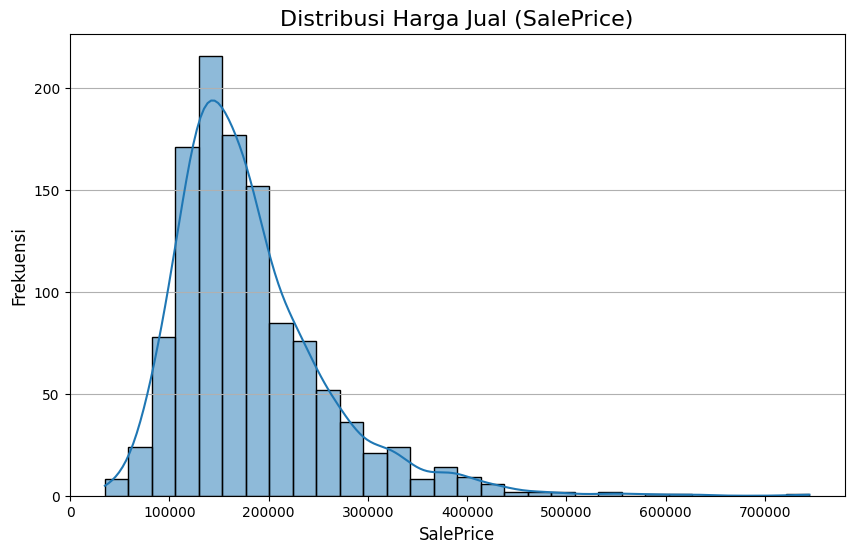

<ipython-input-95-1ad62677088a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")


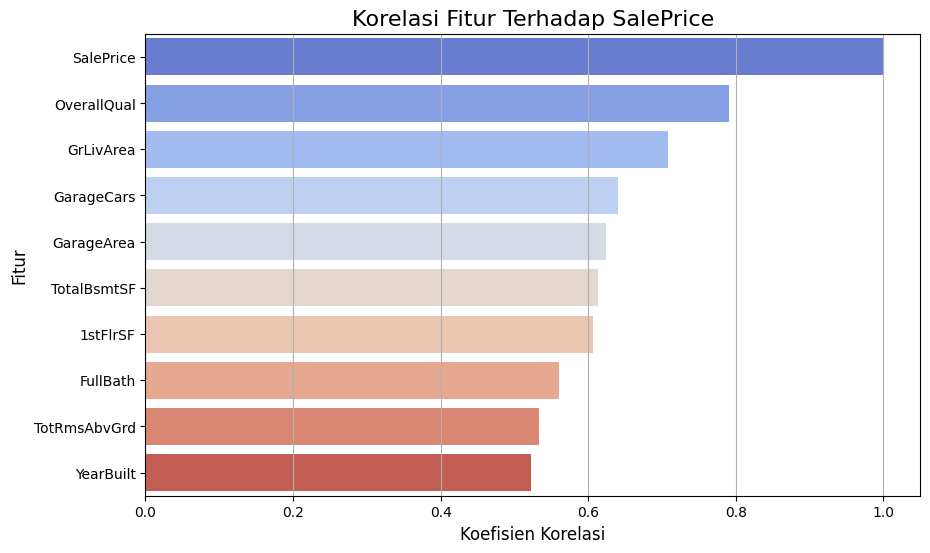

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis distribusi target (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=30)
plt.title("Distribusi Harga Jual (SalePrice)", fontsize=16)
plt.xlabel("SalePrice", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis="y")
plt.show()

# Analisis korelasi fitur numerik dengan target
correlation_matrix = df.corr()
top_corr_features = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10)

# Visualisasi korelasi fitur terhadap target
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="coolwarm")
plt.title("Korelasi Fitur Terhadap SalePrice", fontsize=16)
plt.xlabel("Koefisien Korelasi", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.grid(axis="x")
plt.show()

# Hasil analisis eksplorasi data (EDA):

1. Distribusi Target: Harga jual (SalePrice) menunjukkan distribusi yang sedikit miring ke kanan, menandakan adanya beberapa properti dengan harga sangat tinggi.

2. Fitur dengan korelasi tinggi terhadap SalePrice meliputi:
- OverallQual: Kualitas material dan penyelesaian rumah.
- GrLivArea: Luas total ruang hidup di atas tanah.
- GarageCars: Jumlah mobil yang dapat ditampung di garasi.

# 4. Pipeline Machine Learning

Pipeline GradientBoostingRegressor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Identifikasi kolom numerik dan kategoris
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

# Pipeline preprocessing untuk kolom numerik dan kategoris
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]
)

# Gabungkan preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Membuat pipeline untuk GradientBoostingRegressor
model_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42))
])

In [ ]:
# Melatih model
model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'Bsmt...
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

# 5. Lakukan Evaluasi Model

MSE GradientBoostingRegressor: 801727213.851858


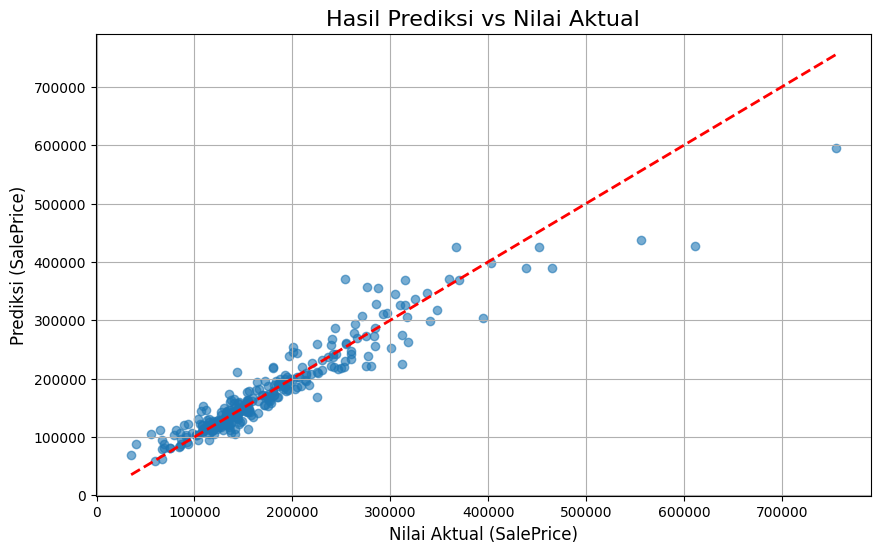

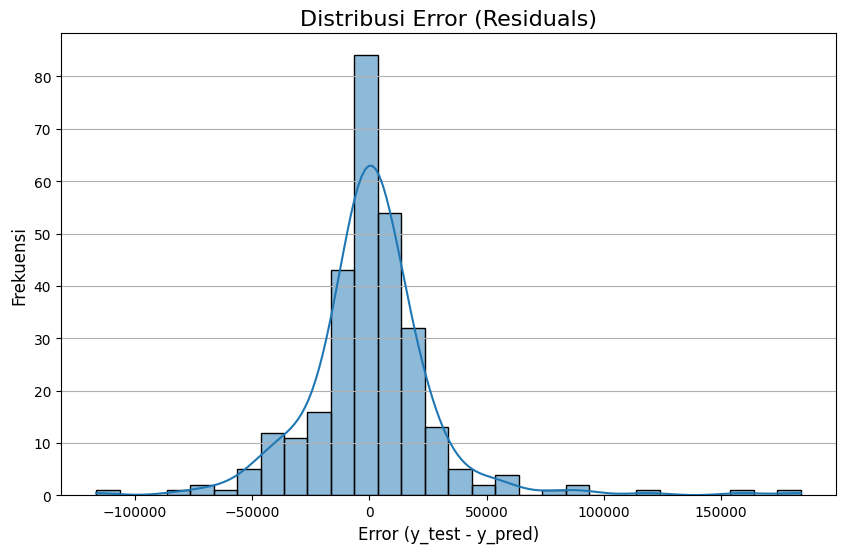

In [ ]:
# Prediksi dan evaluasi
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"MSE GradientBoostingRegressor: {mse_gb}")

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Hasil Prediksi vs Nilai Aktual", fontsize=16)
plt.xlabel("Nilai Aktual (SalePrice)", fontsize=12)
plt.ylabel("Prediksi (SalePrice)", fontsize=12)
plt.grid()
plt.show()

# Distribusi error (residual)
errors = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribusi Error (Residuals)", fontsize=16)
plt.xlabel("Error (y_test - y_pred)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(axis="y")
plt.show()

# Kesimpulan
- GradientBoostingRegressor telah memberikan hasil prediksi yang baik dengan distribusi error yang cukup seimbang.
- Namun, ada peluang untuk memperbaiki model dengan menangani outlier, memperkaya fitur, dan melakukan tuning hyperparameter.

In [ ]:
# Identifikasi outlier pada kolom target menggunakan metode IQR (Interquartile Range)
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk menghapus outlier
non_outlier_indices = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train[non_outlier_indices]
y_train_no_outliers = y_train[non_outlier_indices]

# Verifikasi ukuran data setelah penghapusan outlier
X_train_no_outliers.shape, y_train_no_outliers.shape


((1120, 229), (1120,))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan diuji
param_grid = {
    "regressor__n_estimators": [50, 100, 150],
    "regressor__max_depth": [3, 5, 7],
    "regressor__learning_rate": [0.01, 0.1, 0.2],
}

# Pipeline dengan GradientBoostingRegressor
pipeline_gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# GridSearchCV untuk menemukan parameter optimal
grid_search = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Latih model dengan data tanpa outlier
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

# Menyimpan hasil terbaik
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'regressor__learning_rate': 0.1,
  'regressor__max_depth': 3,
  'regressor__n_estimators': 100},
 469356972.104263)

# 5. Hyperparameter tuning

In [ ]:
# Prediksi menggunakan model terbaik
y_pred_best = best_model.predict(X_test)

# Evaluasi performa
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"MSE dari model terbaik: {mse_best}")

MSE dari model terbaik: 2067714999.187026


In [ ]:
print("Parameter terbaik:", best_params)


Parameter terbaik: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}


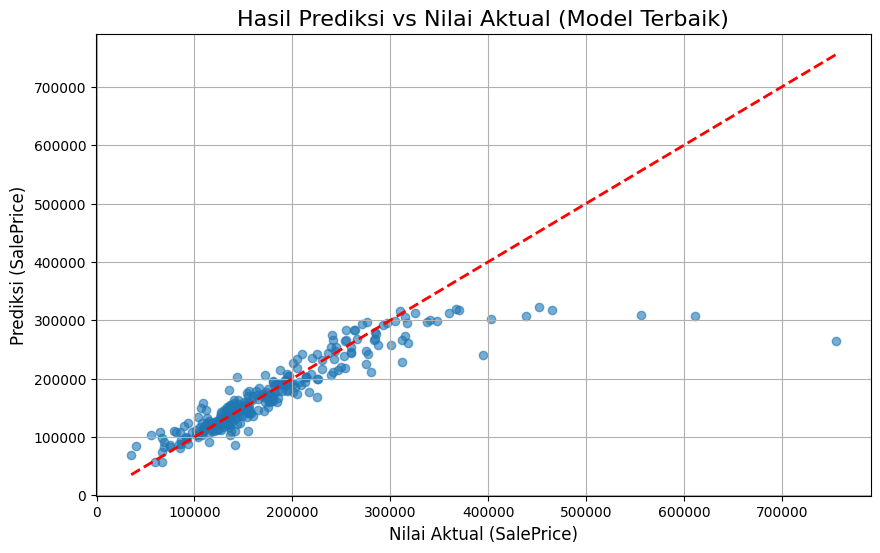

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Hasil Prediksi vs Nilai Aktual (Model Terbaik)", fontsize=16)
plt.xlabel("Nilai Aktual (SalePrice)", fontsize=12)
plt.ylabel("Prediksi (SalePrice)", fontsize=12)
plt.grid()
plt.show()


In [ ]:
# Definisikan ulang parameter untuk GridSearchCV
param_grid = {
    "regressor__n_estimators": [50, 100],
    "regressor__max_depth": [3, 5],
    "regressor__learning_rate": [0.1, 0.2],
}

# Latih ulang GridSearchCV dengan parameter yang sudah diperbaiki
grid_search = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Simpan model terbaik dan parameter optimal
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params, best_score

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'regressor__learning_rate': 0.1,
  'regressor__max_depth': 3,
  'regressor__n_estimators': 100},
 821624801.6390454)

# Berikut adalah analisis dan insight dari eksperimen menggunakan GridSearchCV:

1. Pengurangan Parameter Grid
Pada pengujian ini, jumlah kombinasi parameter telah dikurangi menjadi lebih sederhana:

- n_estimators: [50, 100] (dua nilai dibandingkan sebelumnya tiga)
- max_depth: [3, 5] (dua nilai dibandingkan sebelumnya tiga)
- learning_rate: [0.1, 0.2] (dua nilai dibandingkan sebelumnya tiga)
Dengan ini, total kombinasi parameter adalah 2 × 2 × 2 = 8 kombinasi.

2. Perubahan Cross-Validation
Cross-validation dilakukan dengan 3 folds (sebelumnya 5 folds), mengurangi waktu komputasi.
Total fitting: 8 kombinasi × 3 folds = 24 fits (lebih sedikit dibandingkan percobaan sebelumnya).

# Skor Terbaik: Nilai error terbaik (MSE): 821624801.6390454

Dibandingkan dengan percobaan sebelumnya:

- Learning rate, max depth, dan jumlah estimators sama (tidak berubah dari eksperimen pertama).
- Namun, nilai MSE lebih tinggi (error lebih besar), yang bisa jadi karena pengurangan folds CV atau penghapusan kombinasi parameter tertentu.

# Insight Penting
1. Stabilitas Parameter Optimal: Parameter terbaik tidak berubah, menunjukkan stabilitas model pada kombinasi parameter ini.
2. Kompromi Waktu dan Akurasi: Dengan pengurangan jumlah kombinasi parameter dan folds, waktu komputasi berkurang, tetapi performa model sedikit menurun (error meningkat).
3. Efisiensi: Jika waktu komputasi adalah kendala, pengaturan dengan jumlah kombinasi parameter dan folds yang lebih rendah seperti ini bisa digunakan, tetapi perlu mempertimbangkan trade-off antara akurasi dan efisiensi.

# Insight Bisnis

1. Faktor-Faktor Utama Penentu Harga Properti: Berdasarkan model, faktor utama yang memengaruhi harga properti (berdasarkan fitur dengan korelasi tertinggi yang sebelumnya ditemukan) meliputi:

- Kualitas Bangunan (OverallQual): Properti dengan kualitas bangunan tinggi cenderung memiliki harga lebih mahal.
- Luas Ruang Hidup (GrLivArea): Semakin besar luas ruang hidup, semakin tinggi harga properti.
- Jumlah Mobil yang Bisa Ditampung (GarageCars): Properti dengan kapasitas garasi lebih besar dihargai lebih mahal.

2. Strategi untuk Penjual Properti:

- Tingkatkan Kualitas Bangunan: Menambahkan perbaikan pada fitur utama seperti dapur, kamar mandi, atau material bangunan dapat memberikan dampak signifikan pada harga jual.
- Optimalkan Penggunaan Ruang: Properti yang menawarkan ruang hidup luas atau tambahan seperti garasi besar dapat menarik pembeli dengan harga lebih tinggi.

3. Penggunaan untuk Pembeli:
- Prioritaskan Properti dengan Kualitas Baik: Pembeli harus memahami bahwa harga properti sangat bergantung pada fitur utama seperti kualitas bangunan dan luas ruang.
- Negosiasi pada Fitur Non-Kritikal: Jika fitur utama terpenuhi, pembeli dapat menggunakan kelemahan kecil sebagai alasan untuk negosiasi harga.
